# Take home exam

Machine Learning for Finance  
VU Amsterdam    

**Student**<br/> 
David Landveld <br/>
2742120

**Instructors**  
Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Gert Rietveld (g.rietveld@student.vu.nl)  

<span style='color:crimson; font-weight: bold'>Submission deadline: 24 Dec 2021, 6pm CET</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/2/23/VUlogo_Wit_RGB_mettekst_tcm289-835563.svg" width="200" style="position:absolute; top:0; right:20px"/>

----

<span style='color:crimson; font-weight: bold'>This exam is individual work. Collaboration is strictly forbidden. Suspected cases of copying or plagiarism will be sent to the examination board.</span>

**Expectations and general advice**
* Ensure that your notebook runs error-free.
* Only present the necessary code and results.
* Keep your discussions and explanations short and to the point. Very long answers usually hurt more than they help.
* Present visualizations when they are asked for. If you want to include more, make sure they contribute to your answer.
* All data needed is contained in the `data` folder. 

<div style='text-align: center; font-weight: bold; padding-top:30px;'>Good luck!</div>



**Background**

In Assignment 1 we looked at a classification problem with a relatively small set and limited number of features. In this take home we have a labeled data set from an Australian mortgage bank that wants to predict the default of it's lenders. The exact date range of the data is not given but last data point added was in 2018 (time stamps not recorded in the data). The market was booming at the time as can be seen in the graph.

![Australian real estate prices](aud-property-prices.jpeg)

With such a rich data set we will first use economic theory to select 25 features that should help in classifying the observations in defaulted and non-defaulted loans (recorded in the `default` column. Make sure to include the `gender` column. Then we will take the usual step of inspecting the set and understand better what the data is about.


In this exam is divided into two sections. Part I is about applying machine learning methods to examine default prediction in various ways. Each question has a technical part (e.g. data-processing, model fitting) and a comprehension part (e.g. explaining your choices, discussing results). While the technical parts are necessary, we value the comprehension part equally. Part II is thus about your general understanding of machine learning, what pitfalls there are and what the challenges machine learning applications may face in the real world.

----

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">
    Part I: Data preprocessing
</div>

# Question 1 [16P]

Load the following data file
* `data.csv`  and call it `df_data`.
Column 1 (`identifier`) is the unique identifier.  
Column 2-120 are the 119 characteristics of the lenders.  

----

**a)**
The dataset has a very large set of characteristics of the lenders. To make the analysis manageable we want to reduce the number of characteristics to just 25 columns (excluding `identifier` and including `gender'). Select, based on economic and financial knowledge, those features that seem most promising.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [282]:
%reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns
import matplotlib as mpl
from math import sqrt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import RocCurveDisplay
#!pip install scikit-lego
from sklearn.neural_network import MLPClassifier
%matplotlib inline  
import tempfile
import os
import subprocess
from warnings import warn
from aif360.algorithms import Transformer
from aif360.datasets import BinaryLabelDataset
from sklego.metrics import p_percent_score


This is a function I use to create plots. 

In [283]:
def simple_plot(X,Y,title,xlabel,ylabel):
    plt.plot(X,Y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

First I open the dataset and check how it looks. 

In [284]:
path = os.path.join('data','data.csv')

data = pd.read_csv(path)
data

,identifier,default,F_mobile_conter,F_phone_emper,F_phone_worker,F_phone_reached,F_phone_home,F_email,client_occupation,C_family_members,...,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,bureau_hour,bureau_day,bureau_week,bureau_mon,bureau_qrt,bureau_year
0,409422,0,1,1,0,1,1,0,NaN,2.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,4.0
1,267477,0,1,1,1,1,1,0,NaN,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,308127,0,1,1,0,1,0,0,Sales staff,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,340057,0,1,1,1,1,1,0,Medicine staff,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,7.0
4,291404,0,1,0,0,1,0,0,NaN,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,355531,0,1,1,0,1,0,0,Core staff,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0
307507,434455,0,1,1,0,1,0,0,Medicine staff,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
307508,144514,1,1,0,0,1,0,0,NaN,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0
307509,270598,0,1,0,0,1,0,0,NaN,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3.0


I created a list_features list where I stored all the variables I assumed where important. and used these to create the new DataFrame with only 25 features. I made sure 'default' is still in this list, because it allows me to inspect that column as well.

In [285]:
innitial_list_features = ['default','client occupation','C_family_members','rating client','rating client city','contract type','gender' ,'F_car_owner','F_realty_owner','num_children','income','mortgage','annuity','goods_price','client_vouching','income_type','highest_education','family_status','type_housing','age','normalized_population_density','current_job','change_client_registration','organization_type','days_last_phone_change','change_client_identity']
df_data = pd.DataFrame(data, columns=innitial_list_features)
df_data

,default,client occupation,C_family_members,rating client,rating client city,contract type,gender,F_car_owner,F_realty_owner,num_children,...,highest_education,family_status,type_housing,age,normalized_population_density,current_job,change_client_registration,organization_type,days_last_phone_change,change_client_identity
0,0,NaN,2.0,NaN,NaN,NaN,M,Y,Y,0,...,Secondary / secondary special,Married,House / apartment,-17172,0.015221,-75,-9533.0,Business Entity Type 3,-491.0,-714
1,0,NaN,1.0,NaN,NaN,NaN,M,N,Y,0,...,Secondary / secondary special,Single / not married,House / apartment,-19793,0.019689,-817,-9992.0,Business Entity Type 2,0.0,-3205
2,0,NaN,2.0,NaN,NaN,NaN,F,N,N,0,...,Secondary / secondary special,Civil marriage,House / apartment,-10167,0.018029,-482,-3296.0,Trade: type 7,0.0,-2479
3,0,NaN,3.0,NaN,NaN,NaN,F,Y,N,1,...,Secondary / secondary special,Married,House / apartment,-10232,0.035792,-3272,-4867.0,Other,-740.0,-2906
4,0,NaN,1.0,NaN,NaN,NaN,F,N,Y,0,...,Secondary / secondary special,Single / not married,House / apartment,-20538,0.032561,365243,-9055.0,XNA,-696.0,-4068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,NaN,3.0,NaN,NaN,NaN,F,N,Y,1,...,Secondary / secondary special,Married,House / apartment,-12320,0.028663,-3720,-1428.0,Kindergarten,0.0,-3313
307507,0,NaN,1.0,NaN,NaN,NaN,F,N,Y,0,...,Secondary / secondary special,Separated,House / apartment,-22034,0.010147,-1800,-9653.0,Government,-1526.0,-4470
307508,1,NaN,1.0,NaN,NaN,NaN,F,N,Y,0,...,Secondary / secondary special,Widow,House / apartment,-20596,0.025164,365243,-2995.0,XNA,-435.0,-2288
307509,0,NaN,1.0,NaN,NaN,NaN,F,N,Y,0,...,Secondary / secondary special,Single / not married,House / apartment,-22647,0.019101,365243,-1901.0,XNA,0.0,-4721



**b)**
Next, use the methods discussed in the assignments to pre-process the new dataset you constructed in the question **1a.** Make some descriptive statistics, histograms etc to find out more about the distributions of the data. Are there NaNs, outliers etc? Then choose what preprocessing to apply and clearly explain your choices.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

First I make descriptive statistics to see what the data looks like. I start by looking at the dtypes of the variables to discover if there are numerical columns that got classified as an object. By doing this I found out that client occupation was only NaN's, so I removed it. After that I desribed the dataset.

In [286]:
df_data.describe()

,default,client occupation,C_family_members,rating client,rating client city,contract type,num_children,income,mortgage,annuity,goods_price,age,normalized_population_density,current_job,change_client_registration,days_last_phone_change,change_client_identity
count,307511.000000,0.0,307509.000000,0.0,0.0,0.0,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000
mean,0.080729,NaN,2.152665,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,0.020868,63815.045904,-4986.120328,-962.858788,-2994.202373
std,0.272419,NaN,0.910682,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,0.013831,141275.766519,3522.886321,826.808487,1509.450419
min,0.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,0.000290,-17912.000000,-24672.000000,-4292.000000,-7197.000000
25%,0.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,0.010006,-2760.000000,-7479.500000,-1570.000000,-4299.000000
50%,0.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,0.018850,-1213.000000,-4504.000000,-757.000000,-3254.000000
75%,0.000000,NaN,3.000000,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,0.028663,-289.000000,-2010.000000,-274.000000,-1720.000000
max,1.000000,NaN,20.000000,NaN,NaN,NaN,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,0.072508,365243.000000,0.000000,0.000000,0.000000


From the description table it becomes clear that 'rating client', 'rating client city' and 'contract type' are NAN values only, so I remove these as well.	
Then it becomes clear that almost every column has missing values. Which will be corrected after looking at the distributions of the data. 
The last step right here is that I look at the number of unique values for the categorial variables. I would remove the variables where the number of classifications is too high (>100) or too low (<2) I remove them. This however was not necessary.

In [287]:
nan_features = ['client occupation','rating client', 'rating client city', 'contract type', 'current_job']
df_data.drop(nan_features, inplace=True, axis=1)

Before looking at the distributions, I will split the dataset in one with the target and one with the features. 

In [288]:
target_name = 'default'

# `sr_` prefix stands for a pandas Series
sr_target = pd.DataFrame(df_data.loc[:,target_name].copy())

# The features are considered all the dataframe variables 
# excluding 'default'
sr_features = df_data.iloc[:,1:].copy()

#### Distribution analysis of target and features

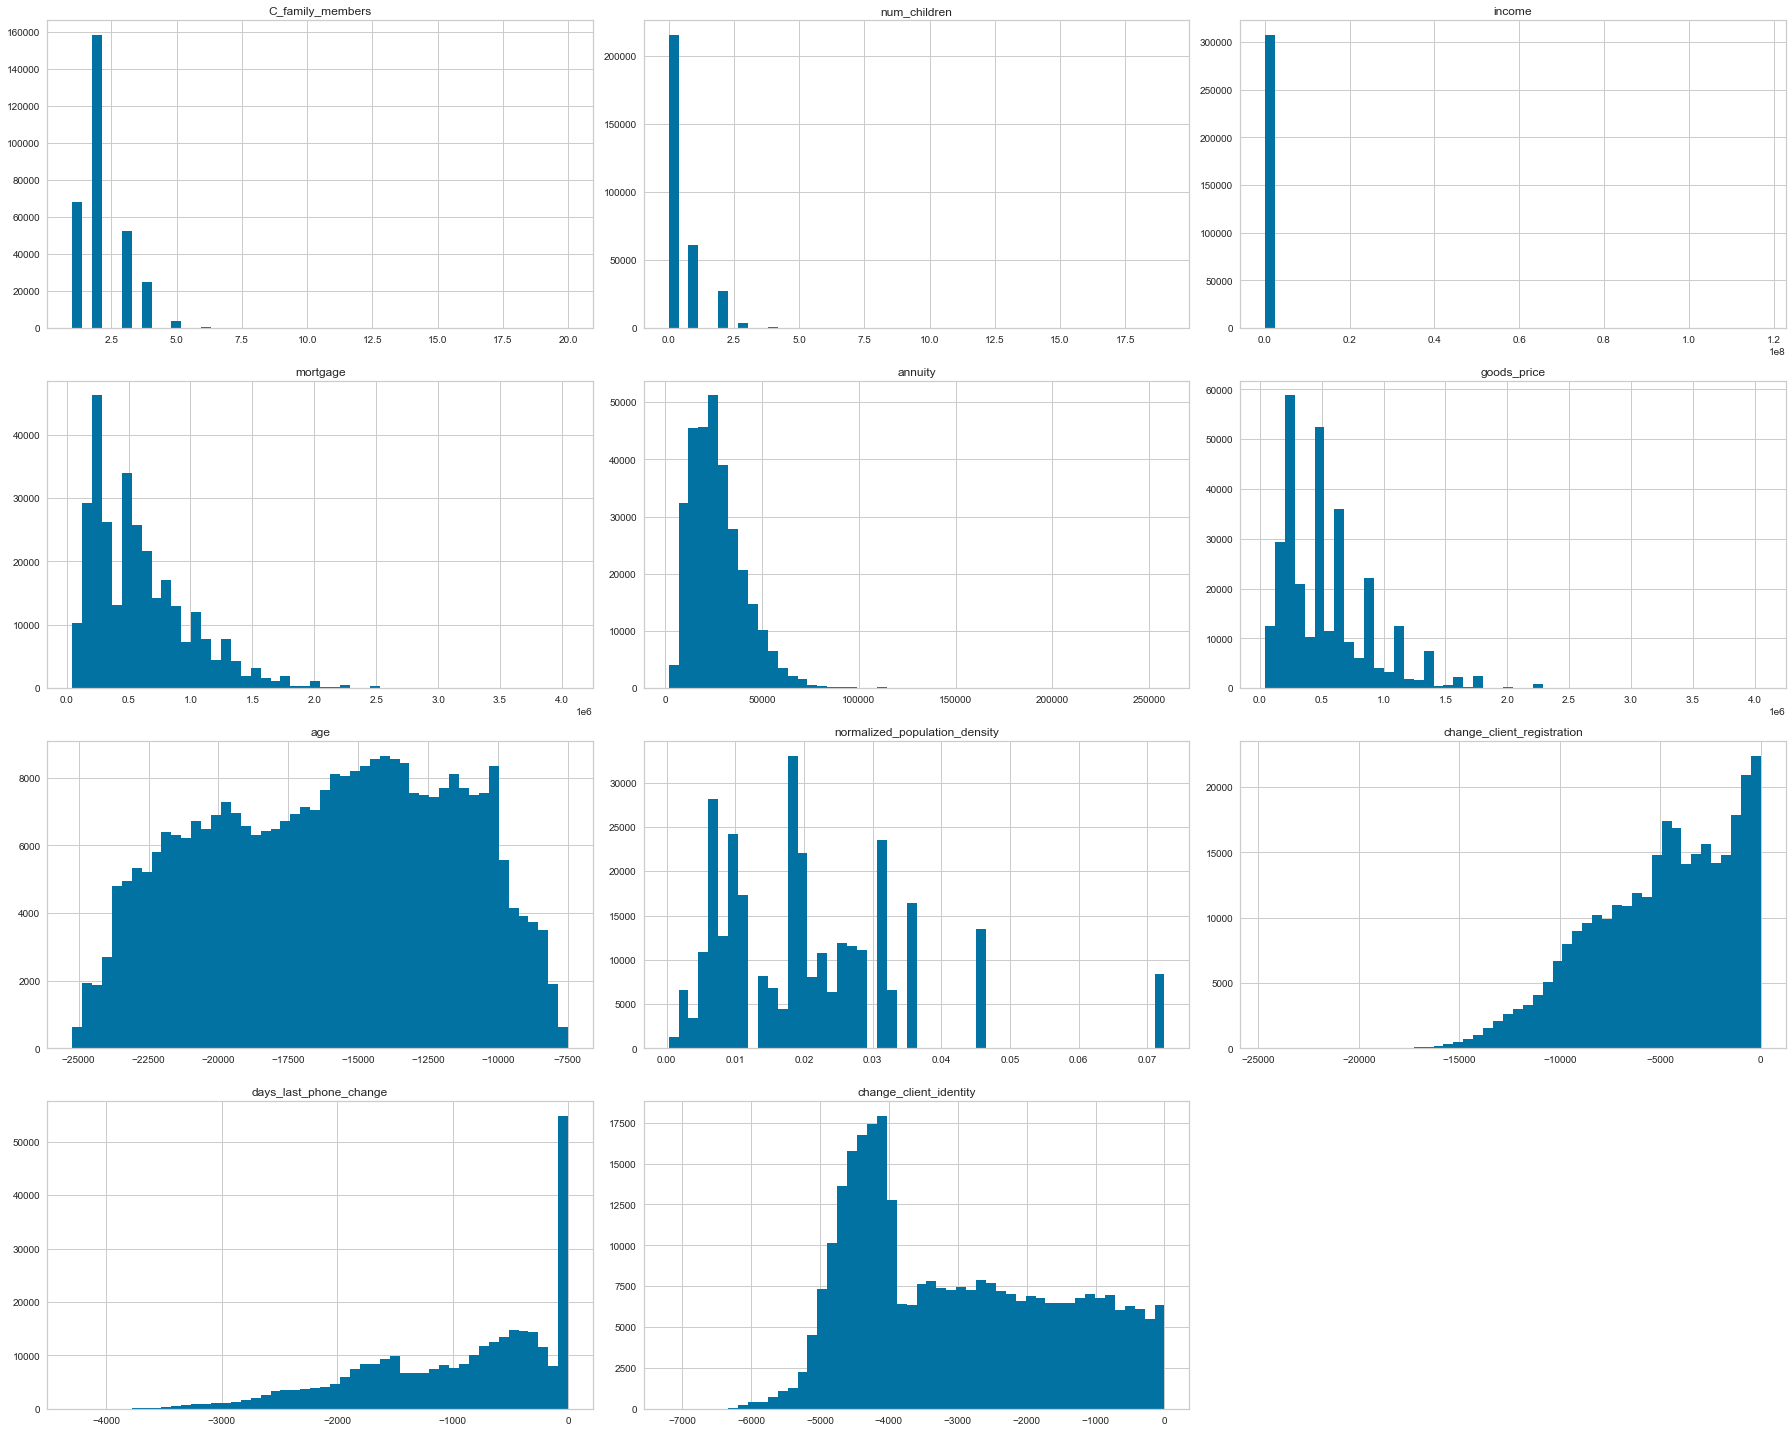

In [289]:
sr_features.hist(bins=50, figsize=(25, 20))
plt.tight_layout()   

In the colomn 'days_last_phone_change' it seems that 0 is recored  alot of times and I chose to replace the 0's in this column by NaN values.

'age', and the three change variables seem to be counting days, the original values are negative but I make them positive to read them more easily.

I also log transform the variables with large numbers so that they become more comparable to the other variables before standardization. I make sure to replace the negative infinite values by NaN values. 

I create dummy variables for every category variable. 

When looking at the histograms it becomes clear that there are many variables with outliers. I deal with these outliers by standardizing using the Robust Scaler form Scikit learn. After doing this I clip the data so that the values do not surpass -4 or 4. Doing this removes all the ouliers outside 0.01% and 99.99% of the distribution and impute NaN values for it.

In [290]:
sr_features['days_last_phone_change'] = sr_features['days_last_phone_change'].replace(0.0, np.nan)

In [291]:
list_absolute= ['change_client_identity','days_last_phone_change','change_client_registration','age']
for i in list_absolute:
    sr_features[i] = sr_features[i].abs()

In [292]:
list_logtransform = ['income', 'mortgage', 'change_client_identity', 'days_last_phone_change', 'change_client_registration', 'age', 'goods_price', 'annuity']
for i in list_logtransform: 
    sr_features[i] = np.log(sr_features[i]).replace(-np.inf, np.nan)

divide by zero encountered in log


In [293]:

# Create dummy features for every category.
list_categories = ['gender','F_car_owner','F_realty_owner','client_vouching','income_type', 'highest_education', 'family_status','type_housing','organization_type'] 
sr_features.replace('XNA', np.nan, inplace=True)
sr_features = pd.get_dummies(sr_features, columns = list_categories, drop_first=True)

In [294]:
remove_outliers = 4

sr_features_std = sr_features.copy()
sr_target_std = sr_target.copy()
#Standardize using RobustScaler
sr_features_std[sr_features_std.columns] = RobustScaler().fit_transform(sr_features_std[sr_features_std.columns])
sr_target_std = RobustScaler().fit_transform(sr_target_std)

#Convert values in the dataframe with a z-score < -4 or > 4 to NaN
sr_features_std[(sr_features_std < -remove_outliers) | (sr_features_std > remove_outliers)] = np.nan

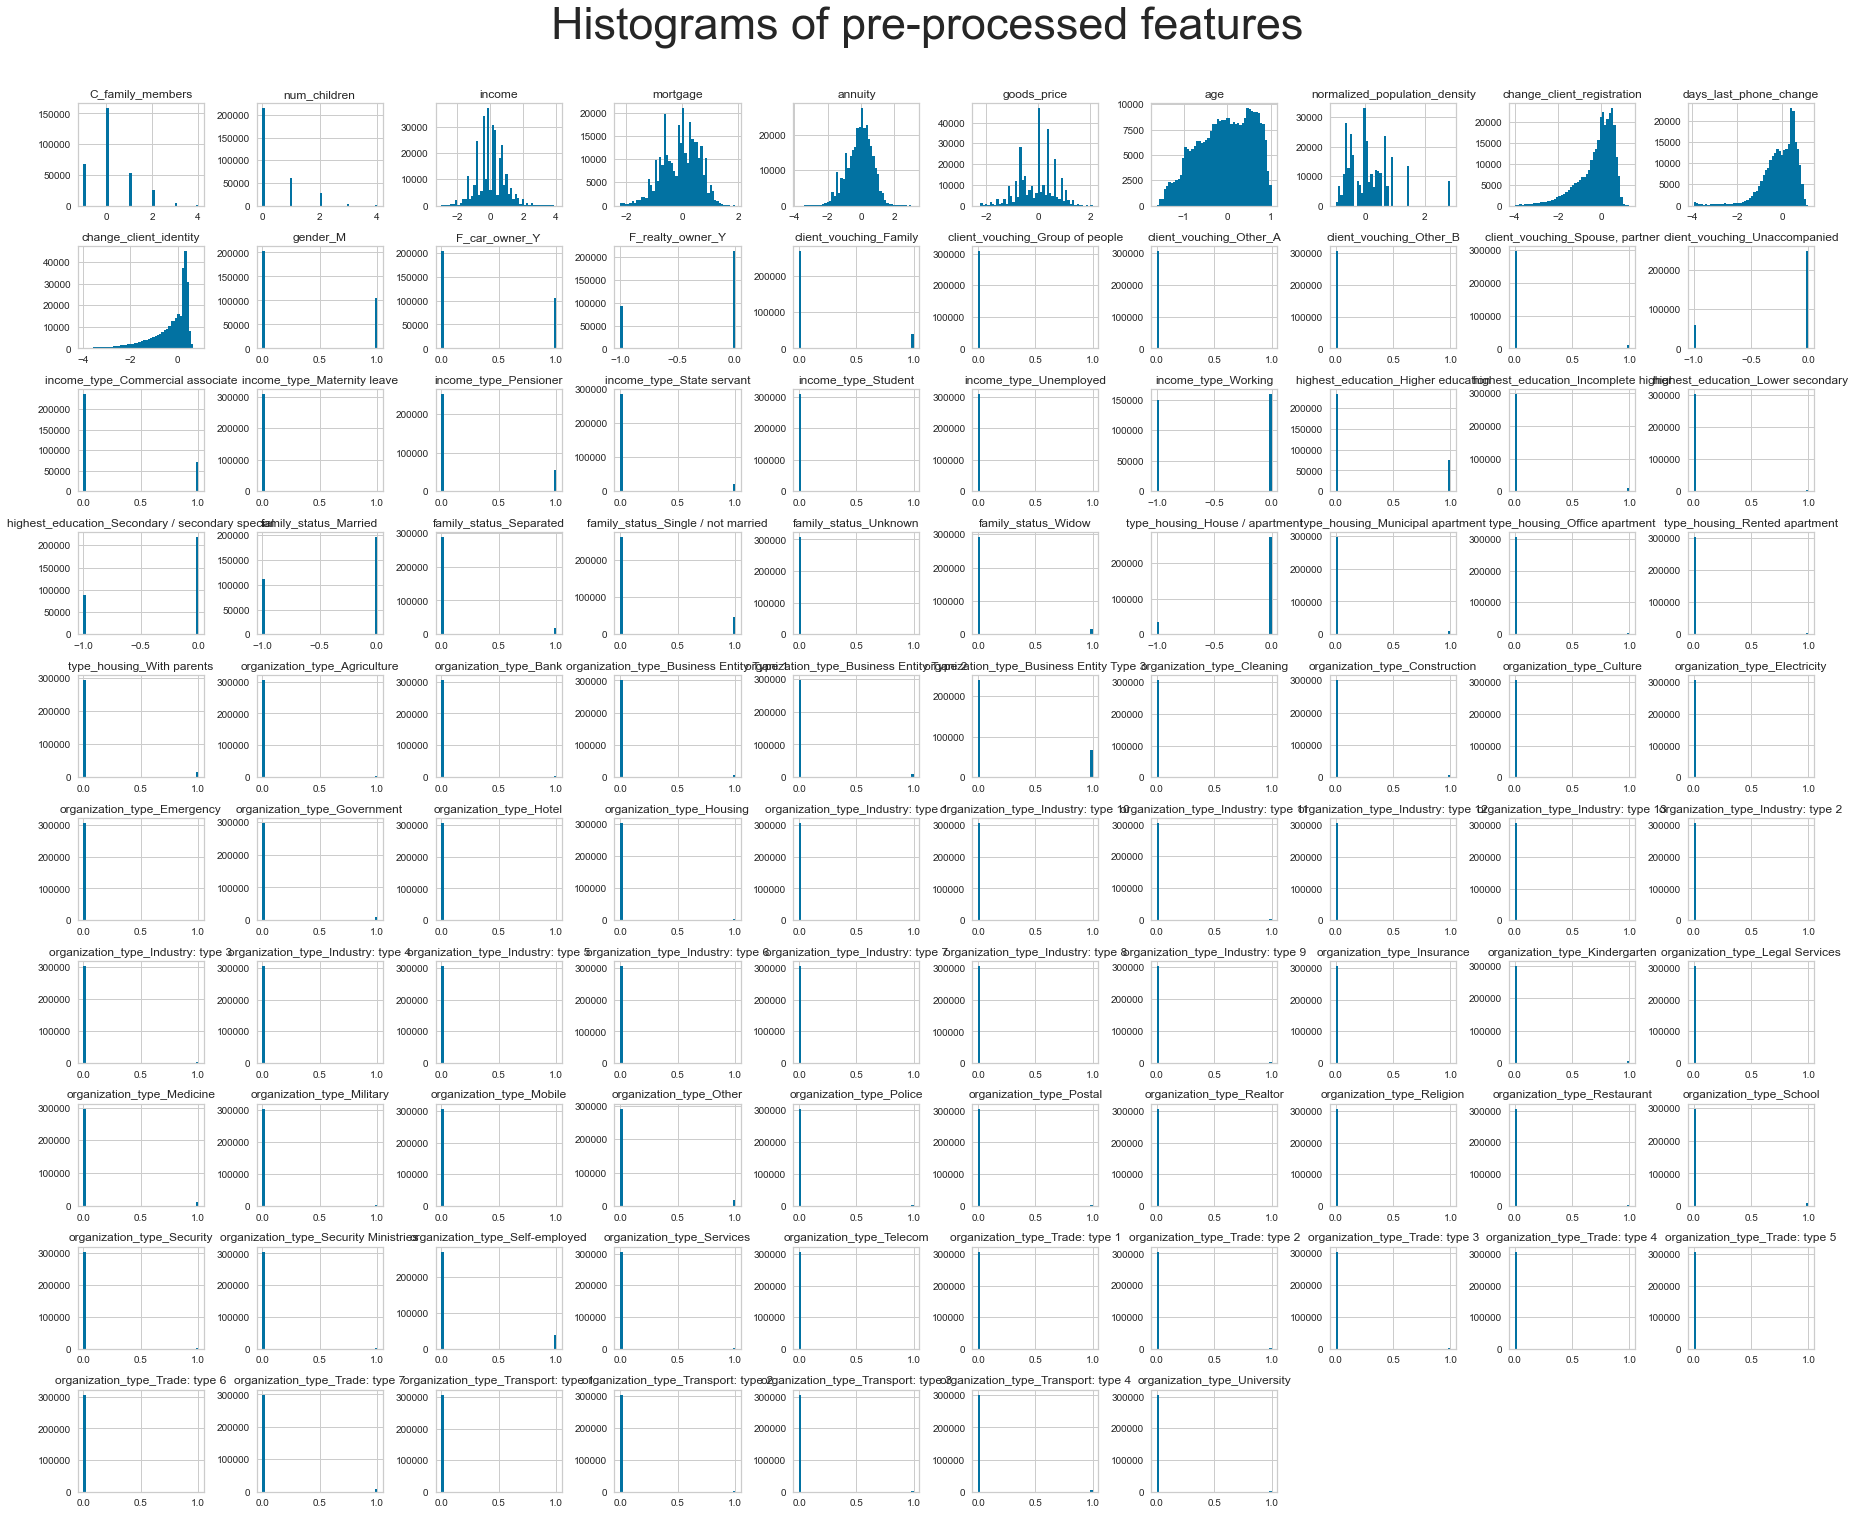

In [295]:
sr_features_std.hist(bins=50, figsize=(25, 20))
plt.tight_layout()   

plt.suptitle('Histograms of pre-processed features', x=0.5, y=1.05, ha='center', fontsize='45')
plt.show()

Lastly, I impute the mean for values where I have NaN values.

In [296]:
sr_features_std = sr_features_std.fillna(sr_features_std.mean())


# Question 2 [20P]

In this question you will make predictions with a voting classifier.

**a)**
Predict loan default using an voting classifier. There should be at least 5 individual models in your voting classifier although you can use more. Note that in this setting the same method with different hyperparameters counts as a different model. Hint: in selecting your models think about why you would want to estimate an voting classifier in the first place (see also question 2.b). 

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

By trial and error I found that using PCA on the sr_features_std dataset drastically improved the naive Bayes predictor.

In [333]:
NUMBER_COMPONENTS = 2

pca = PCA(n_components=NUMBER_COMPONENTS)
X_pca = pca.fit_transform(sr_features_std)

X, y = X_pca, sr_target_std.ravel()

clf1 = LogisticRegression(random_state=1, solver='sag') #Use sag so convergance is possible.
clf2 = RandomForestClassifier(n_estimators=50, random_state=1,verbose=0,max_depth=12)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0, min_samples_leaf=20)
clf5 = DecisionTreeClassifier(random_state=0)
eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('rf2', clf4), ('dt', clf5)],
     voting='soft')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Random Forest 2', 'Decision Tree', 'Ensemble soft']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=3, n_jobs=-1)
     print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.91927 (+/- 0.00000) [Logistic Regression]
Accuracy: 0.91927 (+/- 0.00001) [Random Forest]
Accuracy: 0.91927 (+/- 0.00000) [naive Bayes]


KeyboardInterrupt: 

**b)** A voting classifier can use different rules for the voting. Describe the two options (i.e. hard and soft voting) and see whether it matters in your estimation.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

Soft voting, or weighted average probabilities, is returning the class label as argmax of the sum of predicted probabilties.  Here the final class labels are calculated from the class label with the highest average probability. You provide the initial weights manually, the program will then collect the predicted class probabilities for each classifier and multiply them by the inserted weights and average them to get the average probability scores. 

Hard voting, or majority voting, is a rule that predicts the class labels for a particular sample by using the mode of the class labels predicted by each classifier.

In [299]:
eclf2 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('rf2', clf4), ('dt', clf5)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf2], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Random Forest 2', 'Decision Tree', 'Ensemble hard']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=3, n_jobs=-1)
     print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.91927 (+/- 0.00000) [Logistic Regression]
Accuracy: 0.91927 (+/- 0.00000) [Random Forest]
Accuracy: 0.91927 (+/- 0.00000) [naive Bayes]
Accuracy: 0.91927 (+/- 0.00000) [Random Forest 2]
Accuracy: 0.84953 (+/- 0.00128) [Decision Tree]
Accuracy: 0.91927 (+/- 0.00000) [Ensemble hard]


It apparently does not matter if we use a soft or hard rule for this dataset. Because I get the same Accuracy (0.92) values for a soft and hard voting rules. 

**c)**
Why does an voting classifier model generally perform better than each of the individual model separately? 

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

A voting classifier model generally performs better due to it taking all the parts of other models that have high prediction accuracy and leaves out the parts where the prediction is bad. The intuition behind why it works better is that the errors are assumed to be independent and then using a combination will reduce the variance. Here we also assume that all n base classifiers are having the same error rate. Essentially, these erros get multiplied against each other and then summed up by using a probability mass function of a binomial distribution. 

**d)**
Plot a ROC curve for estimated ensemble model in question **2a**. Explain how the curve is constructed and give an interpretation of the figure.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [300]:
from sklearn.metrics import RocCurveDisplay

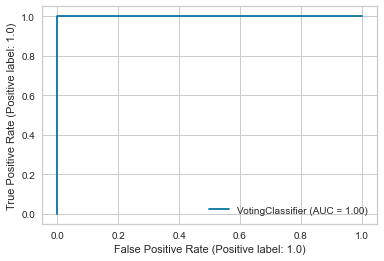

In [301]:
RocCurveDisplay.from_estimator(
   eclf.fit(X,y),X,y)

We see that the ensemble model from 2a works perfect in predicting defaults. The AUROC =1, where 1 would be perfect predictor. 


# Question 3 [20P]
 A classifier that makes a binary class prediction $\hat y \in [0,1]$ given a sensitive binary attribute $g \in [0,1]$ satisfies the p\%-rule if the following inequality holds:

  $min  \Big( 
          \frac{P(\hat y = 1 | g =1)}{P(\hat y = 1 | g =0)}, 
          \frac{P(\hat y = 1 | g =0)}{P(\hat y = 1 | g =1)} 
        \Big) 
        \le 
          \frac{p}{100}$
  


* The rule states that the ratio between the probability of a positive outcome given the sensitive attribute being true and the same probability given the sensitive attribute being false is no less than p:100
* So, when a classifier is completely fair it will satisfy a 100\%-rule. In contrast, when it is completely unfair it satisfies a 0\%-rule.



**a)** 
Calculate the fairness as defined here.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [302]:
from sklego.metrics import p_percent_score

In [314]:
eclf.fit(sr_features_std,y)
print('p_percent_score:', p_percent_score(sensitive_column="gender_M")(eclf, sr_features_std))

p_percent_score: 0.21973376130221212


**b)**
Explain your results. How fair is your model? 

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

The model seems to be very unfair since the value (21.9%) is much closer to 0% (completely unfair) then to 100% (perfectly fair). If the score would be 100% it means that memberships out a certain class have no correlation with the default decision.  However, the category variable gender_M, where 1 is being male, seems to be leading to unfair predictions about default. 

**c)**
Your model is likely to be less than 100% fair. At [AI Fairness 360
](https://aif360.mybluemix.net/) a large number of bias mitigation algorithms are available. The main page lists for instance *Optimized pre-processing, reweighing, adversarial debiasing, reject option classification* and then six others. Select two of these approaches, describe their workings and apply both methods to the model you estimated in question **2a**. Discuss and compare the results. Which method do you prefer? Provide arguments.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

The bias mitigation algorithms I chose were: Optimized pre-processing and Prejudice remover. I try to remove bias in my model in that same order

In [304]:
from warnings import warn
import numpy as np
import pandas as pd
from aif360.algorithms import Transformer
from aif360.datasets import BinaryLabelDataset

In [305]:
class OptimPreproc(Transformer):
    """Optimized preprocessing is a preprocessing technique that learns a
    probabilistic transformation that edits the features and labels in the data
    with group fairness, individual distortion, and data fidelity constraints
    and objectives [3]_.
    References:
        .. [3] F. P. Calmon, D. Wei, B. Vinzamuri, K. Natesan Ramamurthy, and
           K. R. Varshney. "Optimized Pre-Processing for Discrimination
           Prevention." Conference on Neural Information Processing Systems,
           2017.
    Based on code available at: https://github.com/fair-preprocessing/nips2017
    """

    def __init__(self, optimizer, optim_options, unprivileged_groups=None,
                 privileged_groups=None, verbose=False, seed=None):
        """
        Args:
            optimizer (class): Optimizer class.
            optim_options (dict): Options for optimization to estimate the
                transformation.
            unprivileged_groups (dict): Representation for unprivileged group.
            privileged_groups (dict): Representation for privileged group.
            verbose (bool, optional): Verbosity flag for optimization.
            seed (int, optional): Seed to make `fit` and `predict` repeatable.
        Note:
            This algorithm does not use the privileged and unprivileged groups
            that are specified during initialization yet. Instead, it
            automatically attempts to reduce statistical parity difference
            between all possible combinations of groups in the dataset.
        """

        super(OptimPreproc, self).__init__(optimizer=optimizer,
            optim_options=optim_options,
            unprivileged_groups=unprivileged_groups,
            privileged_groups=privileged_groups, verbose=verbose, seed=seed)

        self.seed = seed
        self.optimizer = optimizer
        self.optim_options = optim_options
        self.verbose = verbose

        self.unprivileged_groups = unprivileged_groups
        self.privileged_groups = privileged_groups
        if unprivileged_groups or privileged_groups:
            warn("Privileged and unprivileged groups specified will not be "
                 "used. The protected attributes are directly specified in the "
                 "data preprocessing function. The current implementation "
                 "automatically adjusts for discrimination across all groups. "
                 "This can be changed by changing the optimization code.")

    def fit(self, dataset, sep='='):
        """Compute optimal pre-processing transformation based on distortion
        constraint.
        Args:
            dataset (BinaryLabelDataset): Dataset containing true labels.
            sep (str, optional): Separator for converting one-hot labels to
                categorical.
        Returns:
            OptimPreproc: Returns self.
        """
        if len(np.unique(dataset.instance_weights)) > 1:
            warn("Optimized pre-processing will ignore instance_weights in "
                 "the dataset during fit.")
        # Convert the dataset to a dataframe and preprocess
        df, _ = dataset.convert_to_dataframe(de_dummy_code=True, sep=sep,
                                             set_category=True)

        # Subset the protected attribute names and attribute values from
        # input parameters
        self.protected_attribute_names = dataset.protected_attribute_names
        self.privileged_protected_attributes = dataset.privileged_protected_attributes
        self.unprivileged_protected_attributes = dataset.unprivileged_protected_attributes

        # Feature names
        self.Y_feature_names = dataset.label_names
        self.X_feature_names = [n for n in df.columns.tolist()
                                if n not in self.Y_feature_names
                                and n not in self.protected_attribute_names]
        self.feature_names = (self.X_feature_names + self.Y_feature_names
                            + self.protected_attribute_names)

        # initialize a new OptTools object
        self.OpT = self.optimizer(df=df, features=self.feature_names)

        # Set features
        self.OpT.set_features(D=self.protected_attribute_names,
                              X=self.X_feature_names,
                              Y=self.Y_feature_names)

        # Set Distortion
        self.OpT.set_distortion(self.optim_options['distortion_fun'],
                                clist=self.optim_options['clist'])

        # solve optimization for previous parameters
        self.OpT.optimize(epsilon=self.optim_options['epsilon'],
                          dlist=self.optim_options['dlist'],
                          verbose=self.verbose)

        # Compute marginals
        self.OpT.compute_marginals()

        return self

    def transform(self, dataset, sep='=', transform_Y=True):
        """Transform the dataset to a new dataset based on the estimated
        transformation.
        Args:
            dataset (BinaryLabelDataset): Dataset containing labels that needs
                to be transformed.
            transform_Y (bool): Flag that mandates transformation of Y (labels).
        """

        if len(np.unique(dataset.instance_weights)) > 1:
            warn("Optimized pre-processing will ignore instance_weights in "
                 "the dataset during predict. The transformed dataset will "
                 "have all instance weights set to 1.")

        # Convert the dataset to a dataframe and preprocess
        df, _ = dataset.convert_to_dataframe(de_dummy_code=True, sep=sep,
                                             set_category=True)

        # Feature names
        Y_feature_names = dataset.label_names
        D_feature_names = self.protected_attribute_names
        X_feature_names = [n for n in df.columns.tolist()
                           if n not in self.Y_feature_names
                           and n not in self.protected_attribute_names]

        if (X_feature_names != self.X_feature_names or
            D_feature_names != self.protected_attribute_names):

           raise ValueError("The feature names of inputs and protected "
                            "attributes must match with the training dataset.")

        if transform_Y and (Y_feature_names != self.Y_feature_names):
            raise ValueError("The label names must match with that in the training dataset")

        if transform_Y:
            # randomized mapping when Y is requested to be transformed
            dfP_withY = self.OpT.dfP.applymap(lambda x: 0 if x < 1e-8 else x)
            dfP_withY = dfP_withY.divide(dfP_withY.sum(axis=1), axis=0)

            df_transformed = _apply_randomized_mapping(df, dfP_withY,
                features=D_feature_names+X_feature_names+Y_feature_names,
                random_seed=self.seed)
        else:
            # randomized mapping when Y is not requested to be transformed
            d1 = self.OpT.dfFull.reset_index().groupby(
                D_feature_names+X_feature_names).sum()
            d2 = d1.transpose().reset_index().groupby(X_feature_names).sum()
            dfP_noY = d2.transpose()
            dfP_noY = dfP_noY.drop(Y_feature_names, 1)
            dfP_noY = dfP_noY.applymap(lambda x: x if x > 1e-8 else 0)
            dfP_noY = dfP_noY/dfP_noY.sum()

            dfP_noY = dfP_noY.divide(dfP_noY.sum(axis=1), axis=0)

            df_transformed = _apply_randomized_mapping(
                                df, dfP_noY,
                                features=D_feature_names+X_feature_names,
                                random_seed=self.seed)

        # Map the protected attributes to numeric values
        for idx, p in enumerate(self.protected_attribute_names):
            pmap = dataset.metadata["protected_attribute_maps"][idx]
            pmap_rev = dict(zip(pmap.values(), pmap.keys()))
            df_transformed[p] = df_transformed[p].replace(pmap_rev)

        # Map the labels to numeric values
        for idx, p in enumerate(Y_feature_names):
            pmap = dataset.metadata["label_maps"][idx]
            pmap_rev = dict(zip(pmap.values(), pmap.keys()))
            df_transformed[p] = df_transformed[p].replace(pmap_rev)

        # Dummy code and convert to a dataset
        df_dum = pd.concat([pd.get_dummies(df_transformed.loc[:, X_feature_names],
                            prefix_sep="="),
                            df_transformed.loc[:, Y_feature_names+D_feature_names]],
                            axis=1)

        # Create a dataset out of df_dum
        dataset_transformed = BinaryLabelDataset(
            df=df_dum,
            label_names=Y_feature_names,
            protected_attribute_names=self.protected_attribute_names,
            privileged_protected_attributes=self.privileged_protected_attributes,
            unprivileged_protected_attributes=self.unprivileged_protected_attributes,
            favorable_label=dataset.favorable_label,
            unfavorable_label=dataset.unfavorable_label,
            metadata=dataset.metadata)

        return dataset_transformed

    def fit_transform(self, dataset, sep='=', transform_Y=True):
        """Perfom :meth:`fit` and :meth:`transform` sequentially."""

        return self.fit(dataset, sep=sep).transform(dataset, sep=sep,
                                                    transform_Y=transform_Y)

##############################
#### Supporting functions ####
##############################
def _apply_randomized_mapping(df, dfMap,
                              features=[], random_seed=None):
    """Apply Randomized mapping to create a new dataframe
    Args:
        df (DataFrame): Input dataframe
        dfMap (DataFrame): Mapping parameters
        features (list): Feature names for which the mapping needs to be applied
        random_seed (int): Random seed
    Returns:
        Perturbed version of df according to the randomizedmapping
    """

    if random_seed is not None:
        np.random.seed(seed=random_seed)

    df2 = df[features].copy()
    rem_cols = [l for l in df.columns
                if l not in features]
    if rem_cols != []:
        df3 = df[rem_cols].copy()

    idx_list = [tuple(i) for i in df2.itertuples(index=False)]

    draw_probs = dfMap.loc[idx_list]
    draws_possible = draw_probs.columns.tolist()

    # Make random draws - as part of randomizing transformation
    def draw_ind(x): return np.random.choice(range(len(draws_possible)), p=x)

    draw_inds = [draw_ind(x) for x in draw_probs.values]

    df2.loc[:, dfMap.columns.names] = [draws_possible[x] for x in draw_inds]

    if rem_cols != []:
        return pd.concat([df2, df3], axis=1)
    else:
        return df2

In [306]:
#Transform the dataset

In [307]:
#run p% again with eclf model.

In [308]:
import tempfile
import os
import subprocess
from aif360.algorithms import Transformer

In [309]:
class PrejudiceRemover(Transformer):
    """Prejudice remover is an in-processing technique that adds a
    discrimination-aware regularization term to the learning objective [6]_.
    References:
        .. [6] T. Kamishima, S. Akaho, H. Asoh, and J. Sakuma, "Fairness-Aware
           Classifier with Prejudice Remover Regularizer," Joint European
           Conference on Machine Learning and Knowledge Discovery in Databases,
           2012.
    """

    def __init__(self, eta=1.0, sensitive_attr="", class_attr=""):
        """
        Args:
            eta (double, optional): fairness penalty parameter
            sensitive_attr (str, optional): name of protected attribute
            class_attr (str, optional): label name
        """
        super(PrejudiceRemover, self).__init__(eta=eta,
            sensitive_attr=sensitive_attr, class_attr=class_attr)
        self.eta = eta
        self.sensitive_attr = sensitive_attr
        self.class_attr = class_attr

    def _create_file_in_kamishima_format(self, df, class_attr,
                                         positive_class_val, sensitive_attrs,
                                         single_sensitive, privileged_vals):
        """Format the data for the Kamishima code and save it."""
        x = []
        for col in df:
            if col != class_attr and col not in sensitive_attrs:
                x.append(np.array(df[col].values, dtype=np.float64))
        x.append(np.array(single_sensitive.isin(privileged_vals),
                          dtype=np.float64))
        x.append(np.array(df[class_attr] == positive_class_val,
                          dtype=np.float64))

        fd, name = tempfile.mkstemp()
        os.close(fd)
        np.savetxt(name, np.array(x).T)
        return name

    def fit(self, dataset):
        """Learns the regularized logistic regression model.
        Args:
            dataset (BinaryLabelDataset): Dataset containing true labels.
        Returns:
            PrejudiceRemover: Returns self.
        """
        data = np.column_stack([dataset.features, dataset.labels])
        columns = dataset.feature_names + dataset.label_names
        train_df = pd.DataFrame(data=data, columns=columns)

        all_sensitive_attributes = dataset.protected_attribute_names

        if not self.sensitive_attr:
            self.sensitive_attr = all_sensitive_attributes[0]
        self.sensitive_ind = all_sensitive_attributes.index(self.sensitive_attr)

        sens_df = pd.Series(dataset.protected_attributes[:, self.sensitive_ind],
                            name=self.sensitive_attr)

        if not self.class_attr:
            self.class_attr = dataset.label_names[0]

        fd, model_name = tempfile.mkstemp()
        os.close(fd)
        train_name = self._create_file_in_kamishima_format(train_df,
                self.class_attr, dataset.favorable_label,
                all_sensitive_attributes, sens_df,
                dataset.privileged_protected_attributes[self.sensitive_ind])
        # ADDED FOLLOWING LINE to get absolute path of this file, i.e.
        # prejudice_remover.py
        k_path = os.path.dirname(os.path.abspath(__file__))
        train_pr = os.path.join(k_path, 'kamfadm-2012ecmlpkdd', 'train_pr.py')
        # changed paths in the calls below to (a) specify path of train_pr,
        # predict_lr RELATIVE to this file, and (b) compute & use absolute path
        #  and (c) replace python3 with python
        subprocess.call(['python', train_pr,
                         '-e', str(self.eta),
                         '-i', train_name,
                         '-o', model_name,
                         '--quiet'])
        os.unlink(train_name)

        self.model_name = model_name

        return self

    def predict(self, dataset):
        """Obtain the predictions for the provided dataset using the learned
        prejudice remover model.
        Args:
            dataset (BinaryLabelDataset): Dataset containing labels that needs
                to be transformed.
        Returns:
            dataset (BinaryLabelDataset): Transformed dataset.
        """
        data = np.column_stack([dataset.features, dataset.labels])
        columns = dataset.feature_names + dataset.label_names
        test_df = pd.DataFrame(data=data, columns=columns)
        sens_df = pd.Series(dataset.protected_attributes[:, self.sensitive_ind],
                            name=self.sensitive_attr)

        fd, output_name = tempfile.mkstemp()
        os.close(fd)

        test_name = self._create_file_in_kamishima_format(test_df,
                self.class_attr, dataset.favorable_label,
                dataset.protected_attribute_names, sens_df,
                dataset.privileged_protected_attributes[self.sensitive_ind])

        # ADDED FOLLOWING LINE to get absolute path of this file, i.e.
        # prejudice_remover.py
        k_path = os.path.dirname(os.path.abspath(__file__))
        predict_lr = os.path.join(k_path, 'kamfadm-2012ecmlpkdd', 'predict_lr.py')
        # changed paths in the calls below to (a) specify path of train_pr,
        # predict_lr RELATIVE to this file, and (b) compute & use absolute path,
        # and (c) replace python3 with python
        subprocess.call(['python', predict_lr,
                         '-i', test_name,
                         '-m', self.model_name,
                         '-o', output_name,
                         '--quiet'])
        os.unlink(test_name)
        m = np.loadtxt(output_name)
        os.unlink(output_name)

        pred_dataset = dataset.copy()
        # Columns of Outputs: (as per Kamishima implementation predict_lr.py)
        # 0. true sample class number
        # 1. predicted class number
        # 2. sensitive feature
        # 3. class 0 probability
        # 4. class 1 probability
        pred_dataset.labels = m[:, [1]]
        pred_dataset.scores = m[:, [4]]

        return pred_dataset

In [310]:
#run p% again with eclf model.

# Question 4 [20P]

In this questions you will use a Neural Network (NN) using the neural network classifier in scikit-learn.

The code below defines a neural network with 2 hidden layers with 10 and 12 neurons respectively. For more information see: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

```python
from sklearn.neural_network import MLPClassifier

# The fitting the neural network
MLPClassifier(..., hidden_layer_sizes=(10,12)).fit(..., ...)

```

**a)**
Make predictions using a neural network.
Hint: Use the advice on training a NN given by Guest lecturer Ronald Heijmans or the slides of Lecture 8 (either are fine) to come to reasonable model parameter choices. Explain these choices.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [312]:
x_train, x_test, y_train, y_test = train_test_split(X, sr_target_std.ravel(), test_size=0.2, random_state=0)
nn=MLPClassifier(activation='logistic',solver='sgd', learning_rate_init=0.001,hidden_layer_sizes=(99),random_state=1).fit(x_train,y_train)

In [332]:
print('The Accuracy of the MLPClassifier:')
print(nn.score(x_test, y_test))

The Accuracy of the MLPClassifier:
0.9196136773815912


**b)**
Are these predictions better than the predicitons with the ensemble model in the previous question? Explain.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

The predictions seem to be the same for the MLPClassifier model. The accuracy score in the VotingClassifier model with soft and hard voting rules was 0.92. In this MLPClassifier it is again 0,92. However, this score is achieved after trying multiple parameter combinations that gave lower scores. So it took a little more effort in finding correct values. One last thing to do is a gridsearch in order to find possible better parameter values. This did not result in improvement for me.

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">Part II: A critical view on machine learning</div>

# Question 5 [8P]
Is it possible to speed up training of a `bagging` ensemble by distributing it across multiple servers? What about `boosting` ensembles?

<span style='color:crimson; font-weight: bold'>Word limit = 100 words. </span>


<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

Yes, it is possible to speed up training of a bagging ensemble by distributing it across multiple servers. This is possible because every predictor used in the ensemble is independent. However, it is not possible for a boosting ensemble because in a boosting ensemble the predictors are based on the previous predictors. If multiple servers were to be used, they would not have the ability to sequentially train and improve anymore. 

# Question 6 [8P]
Why would you want to use:

a.  Ridge regression instead of plain Linear Regression

b.  Lasso instead of Ridge Regression

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>


<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

##### a.

In general, a model that applies regularization has a higher performance than a model that does not do this. Therefore, the reason to use a Ridge Regression, is to improve the performance of the model compared to running a plain Linear Regression. 

##### b.

You use Lasso Regression when you also want to let the program do  feature selection for you. Lasso Regression utilized a l1 penalty, which creates a sparse model by pushing many of the features their weights down to zero or almost zero. So if you suspect that many of the initial features of the dataset are not necessary, it can save a lot of time, because you do not have to remove the features manually. 

# Question 7 [8P]
Once a dataset's dimensionality has been reduced, what methods are available to perfectly reverse the operation? Explain.

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:165.7%; font-weight:bold; padding-left:.3em;">Answer</div>

Once a dataset's dimensionality has been reduced, there is generally not much possible in order to perfectly reverse the operation. This is because with dimensionality reduction information gets lost. It also depends on the type of algorithm. some (e.g. PCA) algorithms have good reverse transformation procedures. However, for other algorithms (e.g. T-SNE) it is not possible because there is no existing reverse process. 

What is always possible is to just open the old datasets used before using dimensionality reduction again. So make sure everytime you use a different technique, you save the DataFrame under a different name, this essentially creates backups that you can reuse. This won't be a reversing operation, but you would get the same dataset as before. 